In [1]:
# standard imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# local imports
from metrics import ranking_auc
from plotting import plot_ranking_curves

In [3]:
%load_ext autoreload
%autoreload 2

# Example: Unsupervised Retrieval

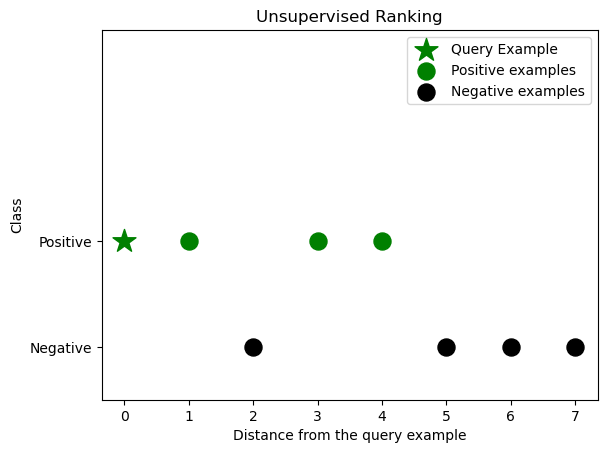

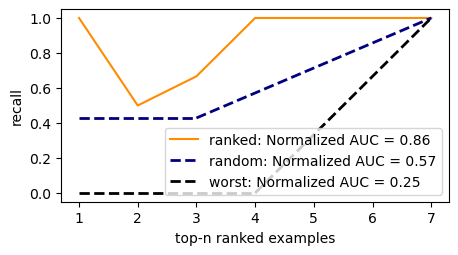

In [4]:
# Sample data
y_scores = np.array([1, 2, 3, 4, 5, 6, 7])
y_trues = np.array([1, 0, 1, 1, 0, 0, 0])

# Define colors based on y_true values
colors = ["green" if y == 1 else "black" for y in y_trues]

# Add a green star at score 0
plt.scatter(0, 1, color="green", marker="*", s=300, label="Query Example")

# Create a scatter plot
# Create a scatter plot for green circles
plt.scatter(y_scores[y_trues == 1], np.ones((y_trues == 1).sum()), color="green", s=150, label="Positive examples")

# Create a scatter plot for black circles
plt.scatter(y_scores[y_trues == 0], np.zeros((y_trues == 0).sum()), color="black", s=150, label="Negative examples")


# Add labels and title
plt.ylim(-0.5, 3)
plt.yticks([0, 1], ["Negative", "Positive"])

plt.xlabel("Distance from the query example")
plt.ylabel("Class")
plt.title("Unsupervised Ranking")
plt.legend()

# Show the plot
plt.show()

result = ranking_auc(
    y_scores=y_scores,
    y_trues=y_trues,
    pos_label=1,
    greater_is_better=False
)
# print(result)

plot_ranking_curves(
    x=result["x"],
    y=result["y"],
    auc=result["auc"],
    population_proportion=result["population_proportion"],
    total_possible_matches=result["total_possible_matches"],
    n_elements=result["n_elements"],
    save=True,
    save_dir=f"./figures/ranking_curves/example",
    save_name="unsupervised",
    save_ext="png",
)


# Example: Supervised Retrieval

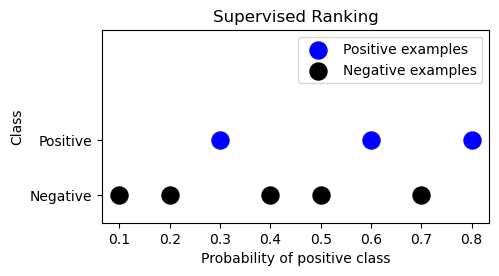

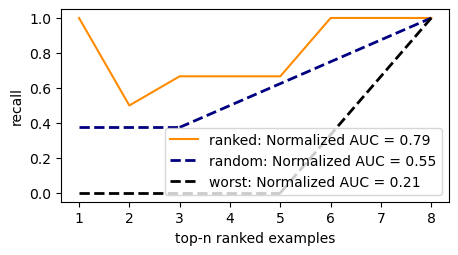

In [5]:
# Hardcoded numpy arrays for y_scores and y_trues
y_scores = np.array([0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
y_trues = np.array([1, 0, 1, 0, 0, 1, 0, 0])

# Create a scatter plot for blue circles
plt.scatter(y_scores[y_trues == 1], np.ones(y_trues.sum()), color="blue", s=150, label="Positive examples")

# Create a scatter plot for black circles
plt.scatter(y_scores[y_trues == 0], np.zeros((y_trues == 0).sum()), color="black", s=150, label="Negative examples")

# Add labels and title
plt.ylim(-0.5, 3)
plt.xlabel("Probability of positive class")
plt.ylabel("Class")
plt.yticks([0, 1], ["Negative", "Positive"])
plt.title("Supervised Ranking")
plt.legend()

# Show the plot
plt.show()

result = ranking_auc(
    y_scores=y_scores,
    y_trues=y_trues,
    pos_label=1,
    greater_is_better=True
)
# print(result)

plot_ranking_curves(
    x=result['x'],
    y=result['y'],
    auc=result['auc'],
    population_proportion=result['population_proportion'],
    total_possible_matches=result['total_possible_matches'],
    n_elements=result["n_elements"],
    save=True,
    save_dir=f"./figures/ranking_curves/example",
    save_name="supervised",
    save_ext="png",
)

## Example: Worst Case Scenario for Supervised Retrieval

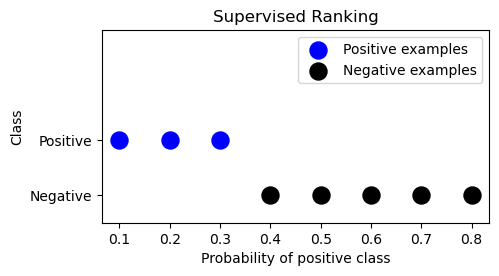

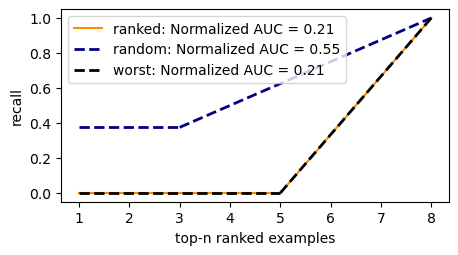

In [6]:
# Hardcoded numpy arrays for y_scores and y_trues
y_scores = np.array([0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
y_trues = np.array([0, 0, 0, 0, 0, 1, 1, 1])

# Create a scatter plot for blue circles
plt.scatter(y_scores[y_trues == 1], np.ones(y_trues.sum()), color="blue", s=150, label="Positive examples")

# Create a scatter plot for black circles
plt.scatter(y_scores[y_trues == 0], np.zeros((y_trues == 0).sum()), color="black", s=150, label="Negative examples")

# Add labels and title
plt.ylim(-0.5, 3)
plt.xlabel("Probability of positive class")
plt.ylabel("Class")
plt.yticks([0, 1], ["Negative", "Positive"])
plt.title("Supervised Ranking")
plt.legend()

# Show the plot
plt.show()


result = ranking_auc(
    y_scores=y_scores,
    y_trues=y_trues,
    pos_label=1,
    greater_is_better=True
)
# print(result)

plot_ranking_curves(
    x=result['x'],
    y=result['y'],
    auc=result['auc'],
    population_proportion=result['population_proportion'],
    total_possible_matches=result['total_possible_matches'],
    n_elements=result["n_elements"],
    save=False,
)